<h3>Set up

In [121]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<h3>Data Understanding

In [122]:
#import and get info
df = pd.read_csv('Dataset.csv', sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
ID                      111733 non-null int64
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMe

In [123]:
#see dataset
df.head(10)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.0,94.0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,IRL,26.0,1385,0x9BEECEE0C18B0957C7424443643948E99A0EC8326EF9...,0x199C61A5442D08987001E170B74D244DF6AF1FC9AE92...,96,174.0,69.0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#get some insights about dataset
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,55867.000000,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111733.000000,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
#Check missing values
df.isnull().sum()

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

With de information above, we can detect some inconsistencies:
<ul>
  <li>In the Age and AverageLeadTime columns there are negative values - its not supposed</li>
  <li>There is a person with 123 years old - impossible</li>
  <li>There are costumers which LodgingRevenue and OtherRevenue is zero.</li>
  <li>There are 4172 Nan values in the Age columns.</li>
  <li>There are 1001 Nan values in the DocIDHash columns (I think we can drop this column).</li>
</ul>

<h4><u>Continuos Variables

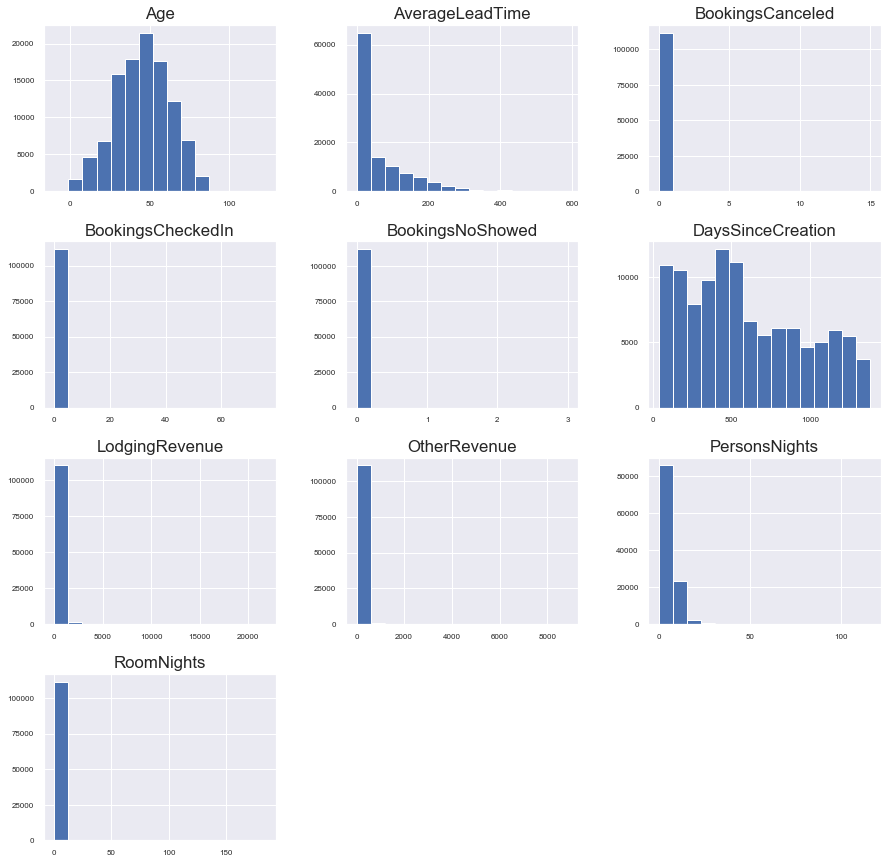

In [126]:
#plot histograms for continuos values
columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime','LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
df_cont = df[columns]
df_cont.hist(bins=15, figsize=(15, 15), layout=(4, 3), xlabelsize=8, ylabelsize=8);

In [127]:
#Peso dos Nan values da Age no Total:
print(str(int((4172/111733)*100)) + str('%'))

3%


<u>Missing Values and Noises Treatment</u>


For <b>Age</b> column, as we can see above, age has a symmetric distribution, and by this reason we can fill the Nan Values with the Age average. For <b> DocIDHash</b> column once we are not going to use it, we can just drop it.

In [128]:
#Fill Nan values in the Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [129]:
# We wont need the NameHash and DocumentIDHash, so let's drop it.
df = df.drop(['NameHash', 'DocIDHash'], axis=1)
print(df.isnull().sum())

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64


After this we are goind to:
<ul>
    <li>Check how many negative values there are in 'Age' and 'AverageLeadTime' columns.</li>
    <li>Check how many clients exist with age greater than 112 years old.</li>
    <li>Drop the values below</li>
    <li>Check how many underage costumers (less then 18 years old) there are in our dataset.</li>
     <li>Check how many underage costumers which LodgingRevenue and OtherRevenue are equal zero.</li>
</ul>

In [131]:
a = str(len(df[df.Age <= 0]))
b = str(len(df[df.Age >=112]))
c = str(len(df[df.AverageLeadTime < 0]))

print('There are {} costumers which Age is equal or less than zero.'.format(a))
print('')
print('There are {} costumers which Age is greater than 112 years old.'.format(b))
print('')
print('There are {} costumers which Average Lead Time is less than zero.'.format(c))

There are 32 costumers which Age is equal or less than zero.

There are 6 costumers which Age is greater than 112 years old.

There are 13 costumers which Average Lead Time is less than zero.


In [140]:
#Let's drop the this values
df_after = df[(df.Age > 0) & (df.Age <= 112)]
df_after = df[df.AverageLeadTime >= 0]
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.000000,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,45.639191,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.000000,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.000000,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.000000,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.000000,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.000000,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.000000,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.000000,36,66,708.00,185.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#Check costumers with underage and no revenue
d = str(len(df[df.Age <= 17]))
e = str(len(df[(df.LodgingRevenue <=0) & (df.OtherRevenue <=0)]))

print('There are {} underage costumers.'.format(d))
print('')
print('There are {} which revenues are equal to zero.'.format(b))

There are 6861 underage costumers.

There are 6 which revenues are equal to zero.


I think it's better if we decide together what to do with these "inconsistencies".

<u>Outliers and Correlations</u>

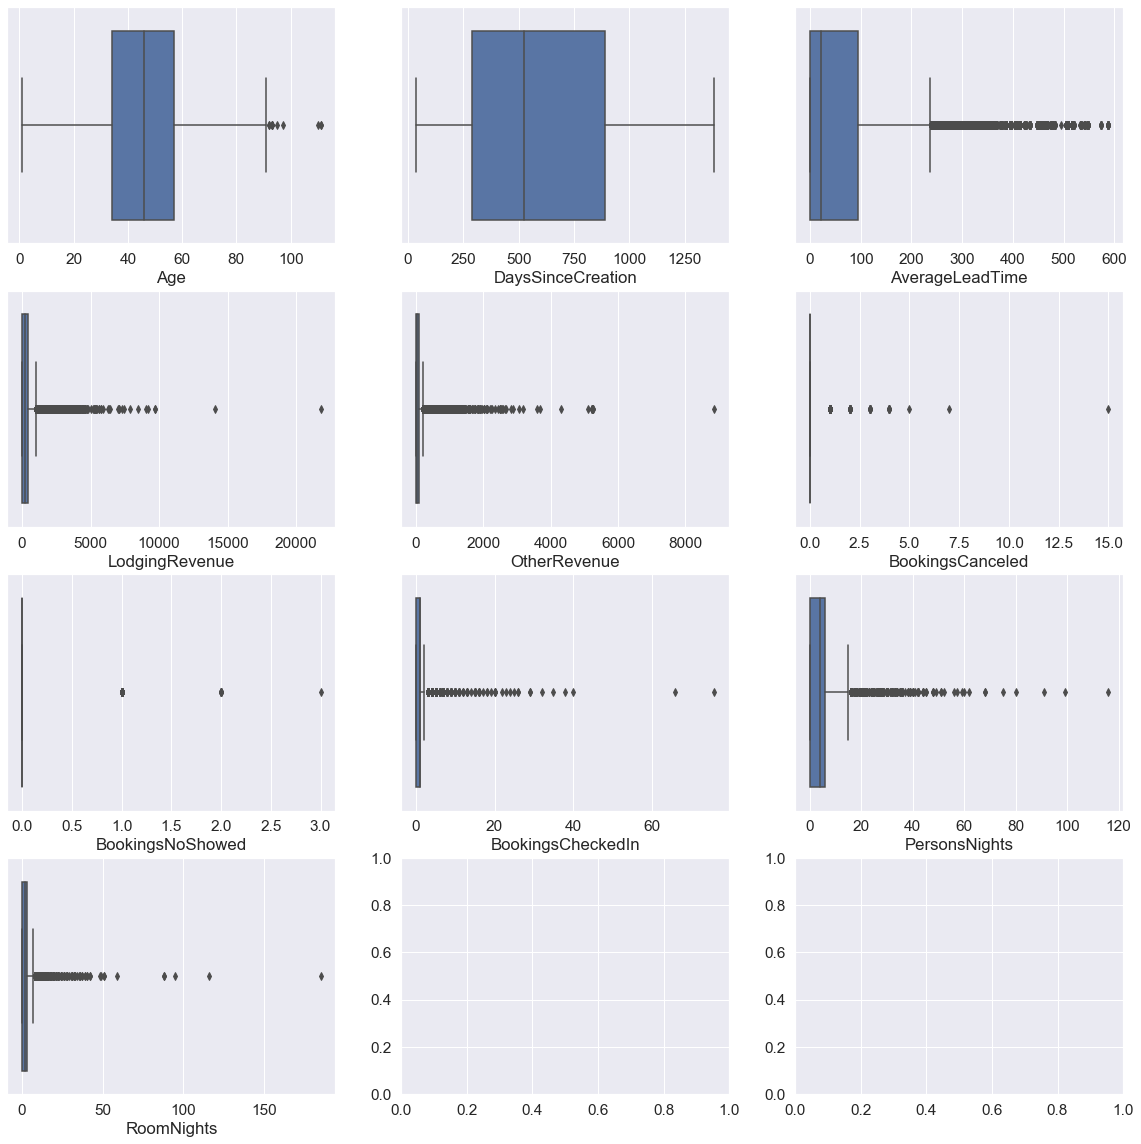

In [142]:
#Outliers detection
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot)
    

Outliers analysis:
<ul>
    <li><b>Age</b>: Consider as outliers after after 100 years old</li>
    <li><b>DaysSinceCreation</b>: No outlier detected</li>
    <li><b>AverageLeadTime</b>:Consider as outliers after after ~580 (?)</li>
    <li><b>Lodging Revenue</b>:Consider as outliers after after 10 000 (?)</li>
    <li><b>Other Revenue</b>:Consider as outliers after after 4000 (?)</li>
    <li><b>Bookings Canceled</b>:Consider as outliers after after 7.5 (?)</li>
    <li><b>Bookings No Showed</b>:No outlier detected (?)</li>
    <li><b>Bookings ChechedIn</b>:Consider as outliers after after 40 (?)</li>
    <li><b>Persons Night</b>:Consider as outliers after after ~65 (?)</li>
    <li><b>Room Nights</b>:Consider as outliers after after ~55 (?)</li>
</ul>

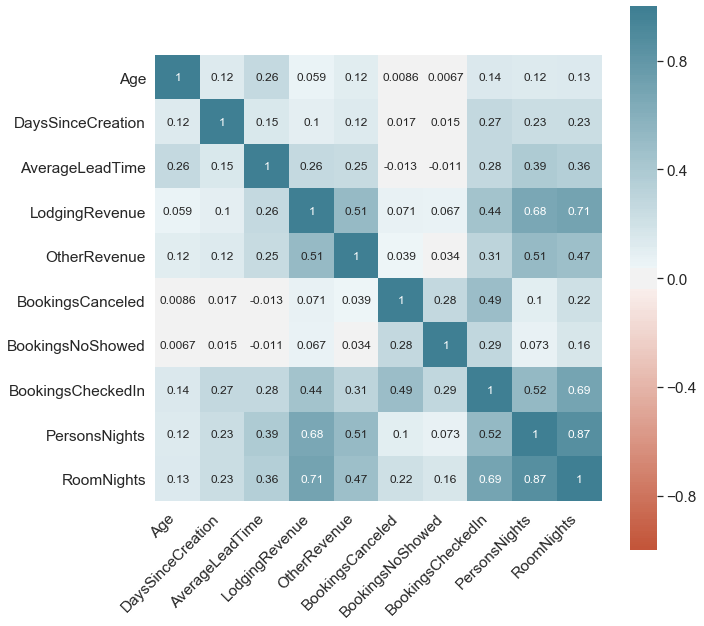

In [144]:
# Plot correlation heatmap of all numeric variables
corr = df_after[columns].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Variables with high correlation:
<ul>
    <li>Lodging Revenue and Room Nights</li>
    <li>Lodging Revenue and Persons Nights</li>
    <li>Persons Nights and Room Nights</li>
    <li>BookingsCheckedIn and Room Nights</li>
</ul>

<h4><u>Categorical Variables

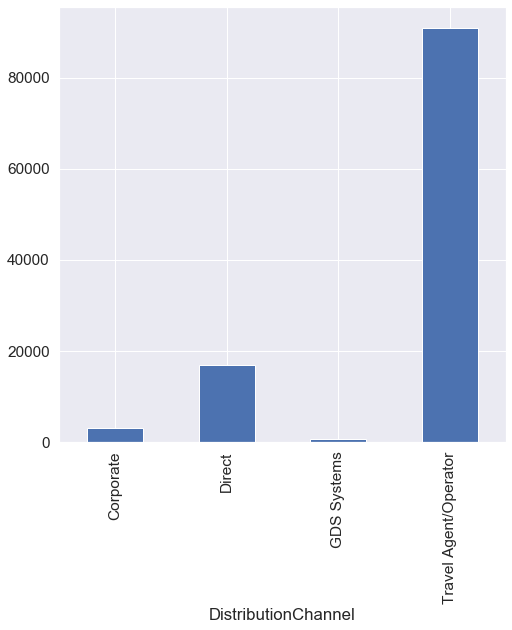

In [196]:
# Check counts of categorical variables
df_cat = df_after.loc[:,['ID','DistributionChannel','MarketSegment']]
channel =df_cat.groupby(['DistributionChannel'])['ID'].count()

channel.plot(kind="bar", 
                 figsize=(8,8))

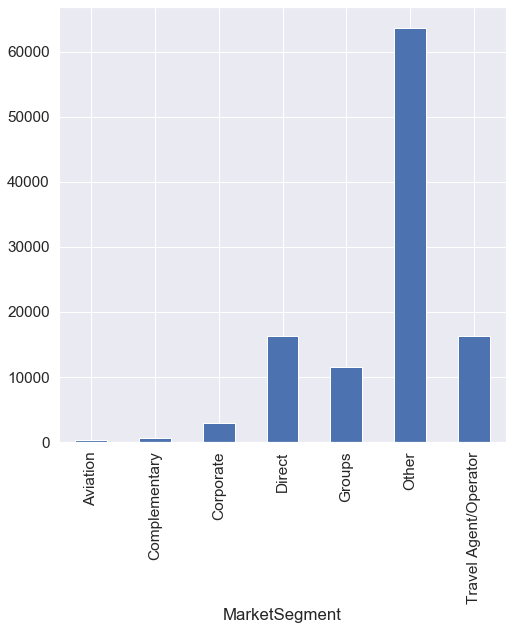

In [197]:
df_cat = df_after.loc[:,['ID','DistributionChannel','MarketSegment']]
market =df_cat.groupby(['MarketSegment'])['ID'].count()

market.plot(kind="bar", 
                 figsize=(8,8))

<h4><u>Boolean Variables

In [211]:
columns = df_after.columns.to_list()
boleans = df_after[columns[14:]]
#count per 0 and 1
boleans = boleans.apply(pd.Series.value_counts).transpose()

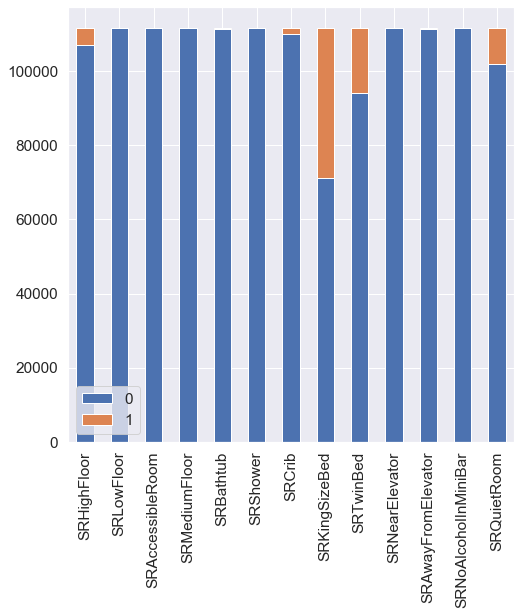

In [212]:
boleans.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)